# Harnessing LLMs for Causal Discovery in Observational Data

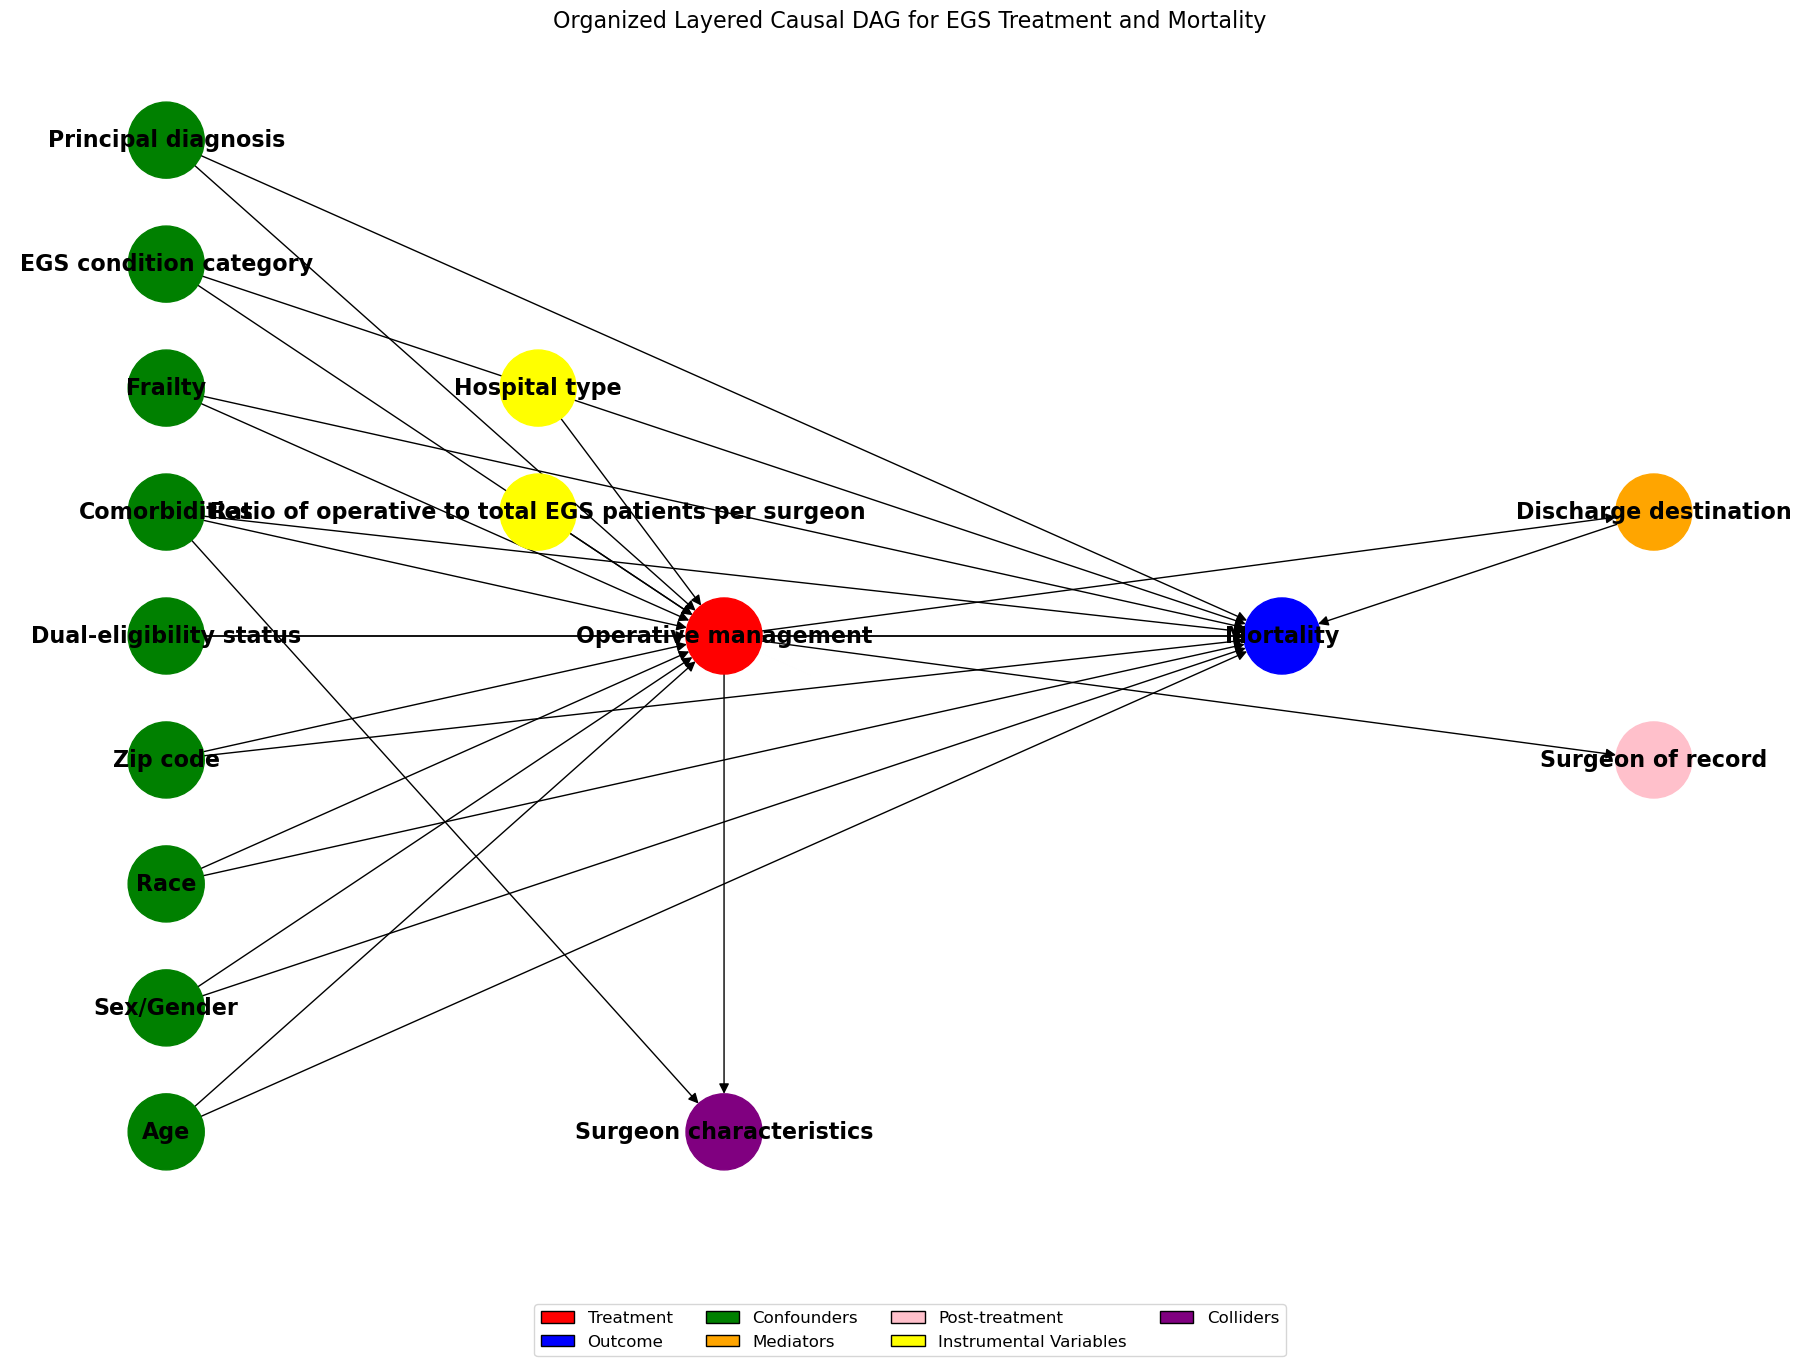

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define variable categories
confounders = ["Age", "Sex/Gender", "Race", "Zip code", "Dual-eligibility status", "Comorbidities", "Frailty", "EGS condition category", "Principal diagnosis"]
mediators = ["Discharge destination"]
colliders = ["Surgeon characteristics"]
instrumental_vars = ["Ratio of operative to total EGS patients per surgeon", "Hospital type"]
post_treatment = ["Surgeon of record"]
treatment = ["Operative management"]
outcome = ["Mortality"]

# Create DAG
G = nx.DiGraph()

# Add nodes
for node in confounders + mediators + colliders + instrumental_vars + post_treatment + treatment + outcome:
    G.add_node(node)

# Add edges
edges = []
for c in confounders:
    edges.append((c, "Operative management"))
    edges.append((c, "Mortality"))
for iv in instrumental_vars:
    edges.append((iv, "Operative management"))
edges.append(("Operative management", "Mortality"))
edges.append(("Operative management", "Discharge destination"))
edges.append(("Discharge destination", "Mortality"))
edges.append(("Operative management", "Surgeon of record"))
edges.append(("Operative management", "Surgeon characteristics"))
edges.append(("Comorbidities", "Surgeon characteristics"))
G.add_edges_from(edges)

# Assign colors
color_map = []
for node in G.nodes():
    if node in treatment:
        color_map.append('red')
    elif node in outcome:
        color_map.append('blue')
    elif node in confounders:
        color_map.append('green')
    elif node in mediators:
        color_map.append('orange')
    elif node in colliders:
        color_map.append('purple')
    elif node in instrumental_vars:
        color_map.append('yellow')
    elif node in post_treatment:
        color_map.append('pink')
    else:
        color_map.append('gray')

# Custom layered layout
pos = {}
for i, node in enumerate(confounders):
    pos[node] = (-3, i)
for i, node in enumerate(instrumental_vars):
    pos[node] = (-1, 5 + i)
pos["Operative management"] = (0, 4)
pos["Mortality"] = (3, 4)
pos["Discharge destination"] = (5, 5)
pos["Surgeon of record"] = (5, 3)
pos["Surgeon characteristics"] = (0, 0)

# Draw DAG
plt.figure(figsize=(18,12))
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=3000, font_size=16, font_weight='bold', arrowsize=15)
plt.title("Organized Layered Causal DAG for EGS Treatment and Mortality", fontsize=16)

# Add legend
legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Treatment'),
    Patch(facecolor='blue', edgecolor='black', label='Outcome'),
    Patch(facecolor='green', edgecolor='black', label='Confounders'),
    Patch(facecolor='orange', edgecolor='black', label='Mediators'),
    Patch(facecolor='pink', edgecolor='black', label='Post-treatment'),
    Patch(facecolor='yellow', edgecolor='black', label='Instrumental Variables'),
    Patch(facecolor='purple', edgecolor='black', label='Colliders')
]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize=12)
plt.savefig("organized_layered_causal_dag_with_legend.png")

In [24]:
dot_graph = """digraph causal_dag {
    // Node definitions with roles
    "Age" [label="Age", color="green", style="filled"];
    "Sex/Gender" [label="Sex/Gender", color="green", style="filled"];
    "Race" [label="Race", color="green", style="filled"];
    "Zip code" [label="Zip code", color="green", style="filled"];
    "Dual-eligibility status" [label="Dual-eligibility status", color="green", style="filled"];
    "Comorbidities" [label="Comorbidities", color="green", style="filled"];
    "Frailty" [label="Frailty", color="green", style="filled"];
    "EGS condition category" [label="EGS condition category", color="green", style="filled"];
    "Principal diagnosis" [label="Principal diagnosis", color="green", style="filled"];

    "Hospital type" [label="Hospital type", color="yellow", style="filled"];
    "Ratio of operative to total EGS patients per surgeon" [label="Surgeon ratio", color="yellow", style="filled"];

    "Operative management" [label="Treatment", color="red", style="filled"];
    "Mortality" [label="Outcome", color="blue", style="filled"];

    "Discharge destination" [label="Discharge destination", color="orange", style="filled"];
    "Surgeon of record" [label="Surgeon of record", color="pink", style="filled"];
    "Surgeon characteristics" [label="Surgeon characteristics", color="purple", style="filled"];

    // Edges
    "Age" -> "Operative management";
    "Age" -> "Mortality";
    "Sex/Gender" -> "Operative management";
    "Sex/Gender" -> "Mortality";
    "Race" -> "Operative management";
    "Race" -> "Mortality";
    "Zip code" -> "Operative management";
    "Zip code" -> "Mortality";
    "Dual-eligibility status" -> "Operative management";
    "Dual-eligibility status" -> "Mortality";
    "Comorbidities" -> "Operative management";
    "Comorbidities" -> "Mortality";
    "Frailty" -> "Operative management";
    "Frailty" -> "Mortality";
    "EGS condition category" -> "Operative management";
    "EGS condition category" -> "Mortality";
    "Principal diagnosis" -> "Operative management";
    "Principal diagnosis" -> "Mortality";

    "Hospital type" -> "Operative management";
    "Ratio of operative to total EGS patients per surgeon" -> "Operative management";

    "Operative management" -> "Mortality";
    "Operative management" -> "Discharge destination";
    "Discharge destination" -> "Mortality";
    "Operative management" -> "Surgeon of record";
    "Operative management" -> "Surgeon characteristics";
    "Comorbidities" -> "Surgeon characteristics";
}"""

This cannot run because there is no dataset.

In [25]:
import dowhy
from dowhy import CausalModel

model = CausalModel(
    graph=dot_graph,
    treatment="Operative management",
    outcome="Mortality"
)
model.view_model()

TypeError: CausalModel.__init__() missing 1 required positional argument: 'data'